"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

 The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.


 The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
#do the imports
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

print('setup complete')

setup complete


In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [13]:
print(df.columns)
print(df.info())

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8

In [4]:
df.describe(exclude='number')

,Month,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330
unique,10,3,2,2
top,May,Returning_Visitor,False,False
freq,3364,10551,9462,10422


In [ ]:
# sns.pairplot(df, hue='Revenue')

Administrative


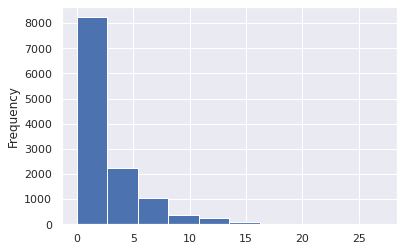

Administrative_Duration


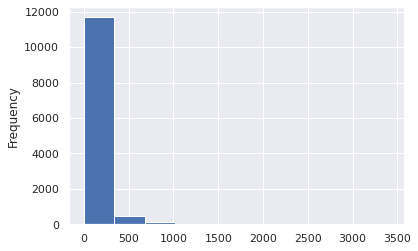

Informational


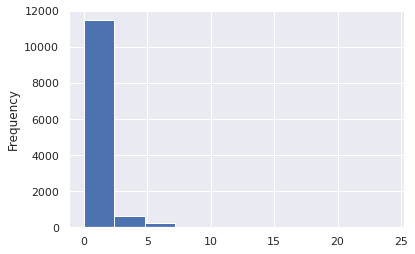

Informational_Duration


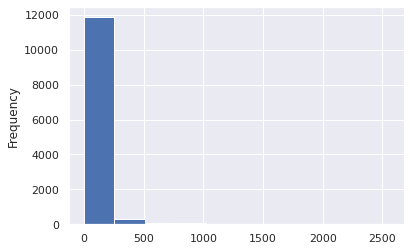

ProductRelated


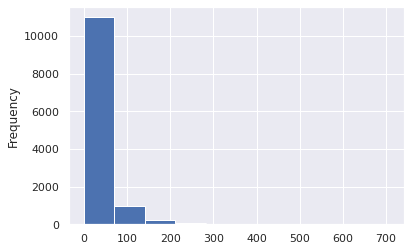

ProductRelated_Duration


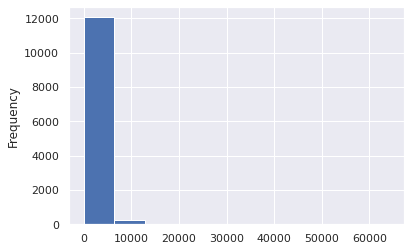

BounceRates


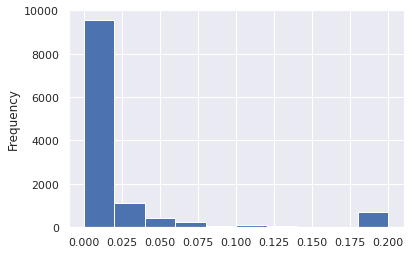

ExitRates


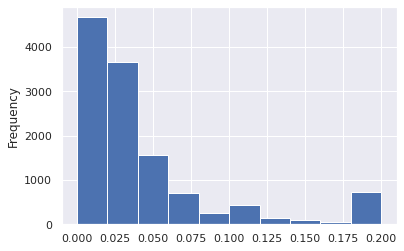

PageValues


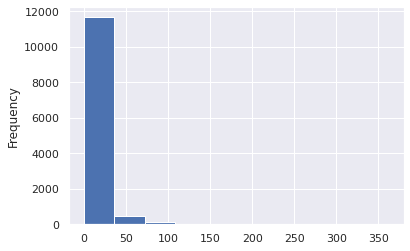

SpecialDay


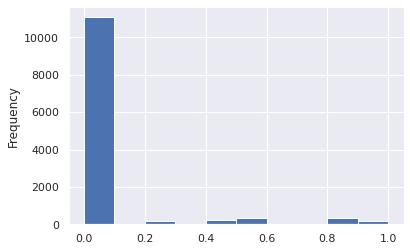

Month
OperatingSystems


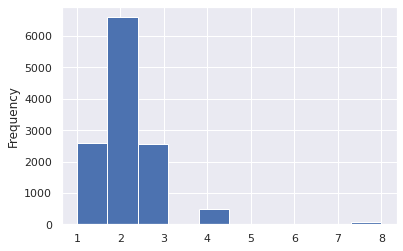

Browser


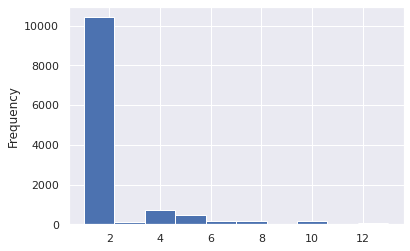

Region


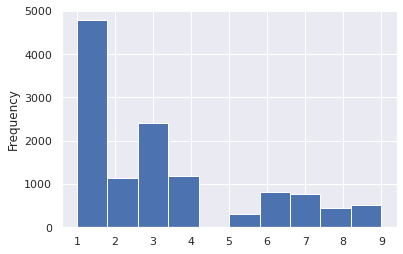

TrafficType


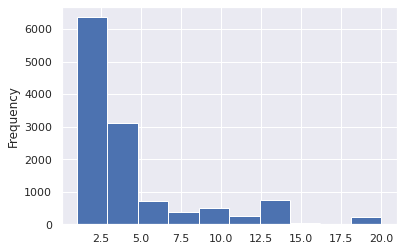

VisitorType


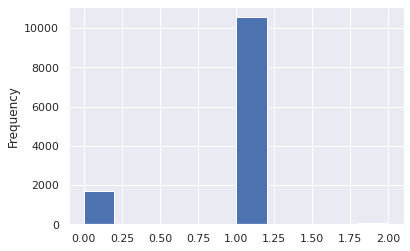

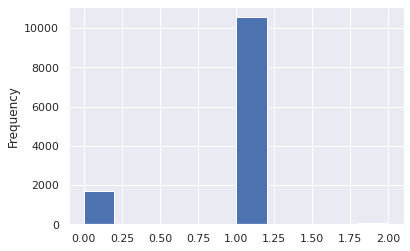

Weekend


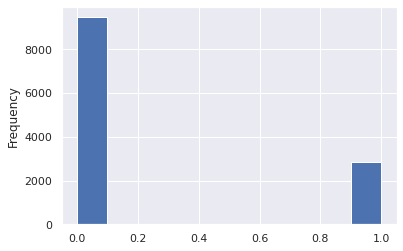

Revenue


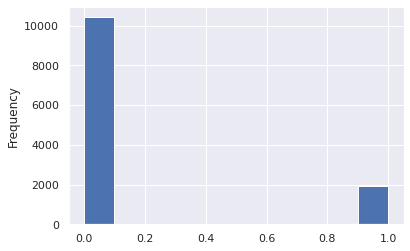

In [111]:
for each_col in df.columns:
    print(each_col)
    if each_col != 'Month':
        if each_col == 'VisitorType':
            df[each_col] = df[each_col].replace({'Returning_Visitor':1, 'New_Visitor':0, 'Other':2})
            df[each_col].plot.hist(bins = 10)
            plt.show();
        if each_col == 'Weekend':
            df[each_col] = df[each_col].astype(int)
            col = df[each_col]
            col.plot.hist(bins = 10)
            plt.show();
        elif each_col == 'Revenue':
            df[each_col] = df[each_col].astype(int)
            col = df[each_col]
            col.plot.hist(bins = 10)
            plt.show();
        else:
            col = df[each_col]
            col.plot.hist(bins = 10)
            plt.show();


In [6]:
# One Hot Encoding categorical features -> Month and VisitorType
df = pd.get_dummies(df)

In [7]:
# Take a look at the data after One Hot Encoding was applied
pd.options.display.max_columns = None
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,False,False,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,True,False,0,0,1,0,0,0,0,0,0,0,0,0,1


In [8]:
# Split the data into training, testing and validation sets
training, val = train_test_split(df, train_size=0.80, random_state=32, stratify=df['Revenue'])
train, test = train_test_split(training, train_size=0.80, random_state=32, stratify=training['Revenue'])

X_train = train.drop(columns=['Revenue'])
y_train = train['Revenue']

X_test = test.drop(columns=['Revenue'])
y_test = test['Revenue']

X_val = val.drop(columns=['Revenue'])
y_val = val['Revenue']

NameError: name 'train_test_split' is not defined

<AxesSubplot:title={'center':'VisitorType'}>

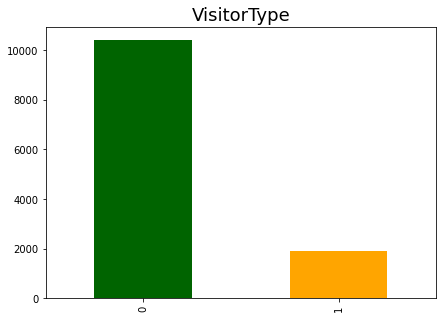

In [85]:
plt.figure(figsize=(7,5))
plt.title("VisitorType",size=18)
df.Revenue.value_counts().plot.bar(color=['darkgreen','orange','gold'])

In [ ]:
month = df['Month'].unique()
month

In [69]:
y = df.Revenue
X = df.drop(['Revenue'], axis = 1)


X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [70]:
X_train.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2509,0,0.0,0,0.0,16,534.916667,0.000000,0.021250,0.0,0.0,May,2,2,7,3,1,0
11116,7,170.5,3,161.5,114,3494.831225,0.003602,0.018762,0.0,0.0,Dec,2,10,1,2,1,0
7292,5,91.0,2,232.8,246,9227.371429,0.006426,0.024960,0.0,0.0,Oct,4,1,4,3,1,1
7394,6,90.6,0,0.0,10,384.800000,0.000000,0.015385,0.0,0.0,Aug,1,2,3,2,0,1
4946,0,0.0,1,38.0,10,311.000000,0.018182,0.036364,0.0,0.0,May,2,10,2,4,1,1


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [81]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

In [82]:
print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
0.15358880778588807


In [11]:
plt.figure(figsize=(7,5))
df['Month'].hist(bins = 30, color = 'teal')
plt.title("MONTH",size=20)

KeyError: 'Month'

In [116]:
plt.title('Test')
plt.hist([df.Month, df.Revenue, df.VisitorType], bins=, stacked=True)
plt.legend('Month', 'Revenue', 'Visitor type')

SyntaxError: invalid syntax (<ipython-input-116-d9f12fc98379>, line 2)